<h1 style=" font-size: 40px;">Mutual Information Project</h1>
<p style="font-family: NewTimesRoman; font-size: 25px;">Parsa Mohammadpour</p>

First we install packages that we are going to use in this project

In [1]:
pip install matplotlib numpy pandas seaborn

Note: you may need to restart the kernel to use updated packages.


# Question 1:  Understanding and Simulating Lognormal Distribution

## Description

The distribution of earnings in a small society of 10,000 individuals follows a **lognormal distribution** due to multiplicative growth over time.

## Tasks:

### Task 1:

#### Task
Initialize a population of 10,000 individuals, each with an initial earning of $1.

#### Answer

Here, we define some variables for configuration and initialize them as the task requires.<br>
We define `INDIVIDUAL_COUNT=10000` and `INITIAL_EARNING=1` as follows:

In [2]:
INDIVIDUAL_COUNT=10000
INITIAL_EARNING=1

Noew, we define a numpy array of individuals and initiliza it with the `INITIAL_EARNING` value at each index as follow:

In [3]:
import numpy as np

earnings = np.full(INDIVIDUAL_COUNT, INITIAL_EARNING)
earnings

array([1, 1, 1, ..., 1, 1, 1])

### Task 2:

#### Task:
Simulate the growth process for 20 periods:
- Each year, earnings grow or shrink by a factor of:
    - 1.10 (10% increase)
    - 1.00 (no change)
    - 0.90 (10% decrease)
  with equal probabilities

#### Answer

For this purpose, we define a variable `PERIOD_NUM` and `EARNING_LIST` and we initialize them with the value that is given in the task description. The code is as follows:

In [4]:
PERIOD_NUM = 20
EARNING_LIST = [1.1, 1.0, 0.9]

Now, as the task requires that we apply each year's earnings on the individuals for `PERIOD_NUM` years:
So, we will have a loop over `PERIOD_NUM` and then at each iteration, for each individual, we have to choose a random element from the `EARNING_LIST` and multiply the individual's earnings by the chosen element.<br>
So, for this, at each iteration that we have (the loop that we have for `PERIOD_NUM`), we randomly (this random selection obeys the **uniform distribution**) choose an element of the `EARNING_LIST`. We do this by calling `np.random.choice()` function which gets three inputs, the list that we want to randomly select its element, the number of these selections, and a boolean to say we choose with or without replacement. (For the next question, we need to have the individuals for the same period, so we keep each year's earnings in a list called `earnings_period_list` and we use it there.)

In [5]:
earnings_period_list = []
for _ in range(PERIOD_NUM):
    earning_list = np.random.choice(EARNING_LIST, len(earnings), replace=True)
    earnings = earnings * earning_list
    earnings_period_list.append(earnings)
earnings

array([0.69327175, 0.55593461, 1.25311008, ..., 0.464091  , 1.26576776,
       1.5162632 ])

### Task 3:

#### Task:
Record the final earnings of all individuals after 20 periods.

#### Answer
We had done this in the previous section, but we do it again.

In [6]:
earnings

array([0.69327175, 0.55593461, 1.25311008, ..., 0.464091  , 1.26576776,
       1.5162632 ])

### Task 4:

#### Task
Plot the histogram of the final earnings to visualize the distribution.

#### Answer

Now, we plot the final earnings distribution as follow:

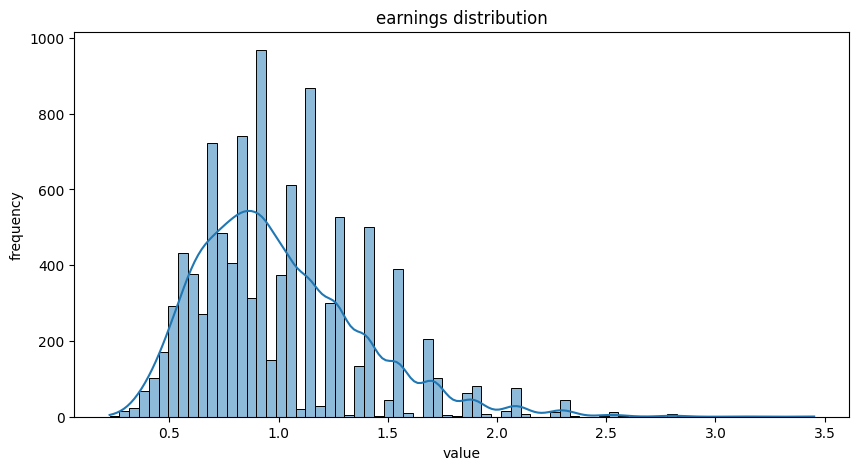

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(earnings, kde=True)
plt.title('earnings distribution')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

Now, we also print some statistics of this array such as:
- Average
- Median
- Max
- Min
- std
- var

In [8]:
print('earnings mean:', np.mean(earnings))
print('earnings median:', np.median(earnings))
print('earnings max:', np.max(earnings))
print('earnings min:', np.min(earnings))
print('earnings std:', np.std(earnings))
print('earnings var:', np.var(earnings))

earnings mean: 1.0006351709233998
earnings median: 0.9320653479069909
earnings max: 3.4522712143931042
earnings min: 0.22648024530411404
earnings std: 0.3745611108627135
earnings var: 0.14029602577070996


We aslo draw some other plots like violin and box polots for individuals:

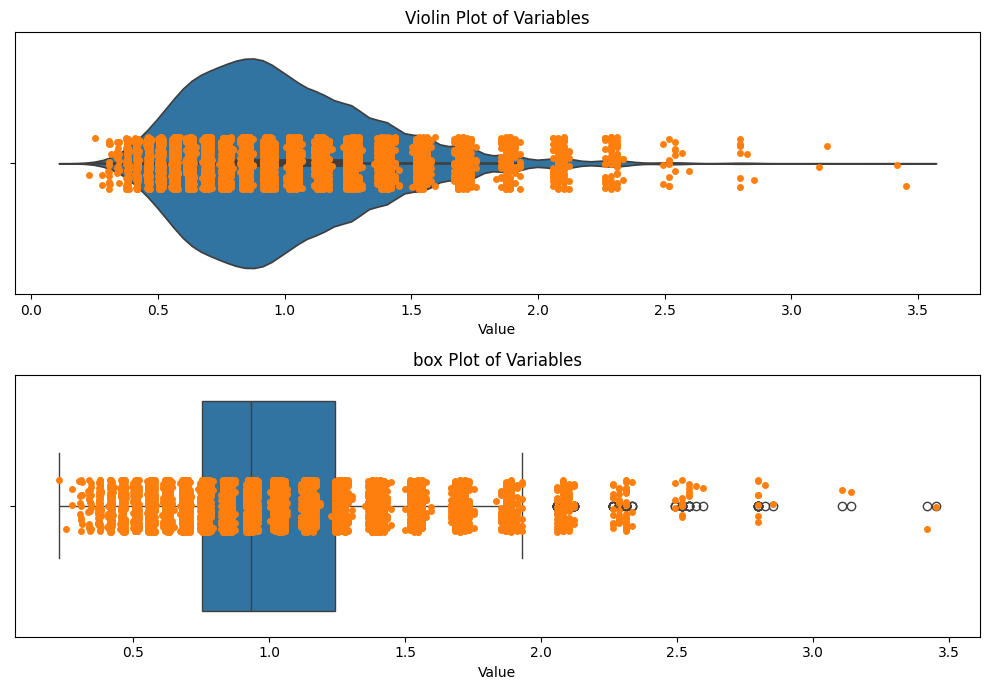

In [9]:
sns.reset_orig()

# Create the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Violin plot
sns.violinplot(x=earnings, ax=ax[0])
sns.stripplot(x=earnings, ax=ax[0])
ax[0].set_title('Violin Plot of Variables')
ax[0].set_xlabel('Value')

# Distribution plot
sns.boxplot(x=earnings, ax=ax[1])
sns.stripplot(x=earnings, ax=ax[1])
ax[1].set_title('box Plot of Variables')
ax[1].set_xlabel('Value')

# Show the plots
plt.tight_layout()
plt.show()


### Task 5:

#### Task
Estimate the parameters of the lognormal distribution (point estimation) from the simulated data.

#### Answer
As we know, the **lognormal** distribution has the below formula:

$$ f\left( x; \theta , \delta^2\right) = \frac{1}{x\sqrt{2\pi}\delta} e^{-\frac{\left(\ln x - \theta \right)^2}{2\delta^2}}$$

Now, we know from the sourcebook, that the **expected value** and **variance** of the above formula, are as follows:
$$\mu = E[X] = e^{\theta + \frac{\delta^2}{2}}$$
$$V(X) = e^{2\theta+2\delta^2} - e^{2\theta+\delta^2}$$

Now, we can say that the relation between lognormal distribution parameters and expected value and variance is as follows:
$$\theta=ln (\mu)  - \delta^2$$
$$\delta^2 = ln\left(1+\frac{\sigma^2}{\mu^2}\right)$$

**The above text is from the reference book.**<br>

We use the **method of momentum** way to estimate the distribution parameters. As we know from the point estimation and the method of momentum, we can estimate the **expected value** of the **population** with the expected value of the **sample** and we can do the same for the variance too.
So, now we calculate $\bar{X}$ and $S^2$ of the sample and then due to above formula, we compute the distribution parameters.

In [10]:
estimated_mean = np.mean(earnings)
estimated_var = sum(np.power(earnings - estimated_mean, 2) / (len(earnings) - 1))
print(f'estimated mean of the population: {estimated_mean}')
print(f'estimated var of the population: {estimated_var}')

estimated mean of the population: 1.0006351709233998
estimated var of the population: 0.14031005677638683


Now, we use the following formula compute $\delta^2$ parameter of the population:

$$\delta^2 = ln\left(1+\frac{\sigma^2}{\mu^2}\right)$$

So the $\delta^2$ is as follows:

In [11]:
delta_2 = np.log(1+estimated_var/np.power(estimated_mean,2))
delta_2

np.float64(0.13114403177240164)

Now, we use the following formula compute $\theta$  parameter of the population:

$$\theta=ln (\mu)  - \delta^2$$

So, the $\theta$ is as follows:

In [12]:
theta = np.log(estimated_mean) - delta_2
theta

np.float64(-0.13050906248467523)

We know (from the reference book) that the lognormal distribution formula is as follows:

$$ f\left( x; \theta , \delta^2\right) = \frac{1}{x\sqrt{2\pi}\delta} e^{-\frac{\left(\ln x - \theta \right)^2}{2\delta^2}}$$

So, now we define a function to compute the probability for each value with the above formula. the function is as follows

In [13]:
def lognormal(x):
    delta = np.sqrt(delta_2)
    
    first_half = 1 / (x * delta * np.sqrt(2 * np.pi))
    power = -((np.log(x) - theta) ** 2) / (2 * delta_2)
    return first_half * np.exp(power)

Now, we test our function to see if it works right or not.

In [14]:
x_axis = np.linspace(np.min(earnings), np.max(earnings), num=len(earnings), endpoint=True)
probabilities = lognormal(x_axis)
str(probabilities)[:120] + '...' # just to avoid printing many lines

'[0.00445427 0.00451378 0.00457392 ... 0.00025072 0.00025045 0.00025018]...'

Now, we plot our lognormal distribution with the estimated values with the earnings of individuals. So, the plot is as follows:

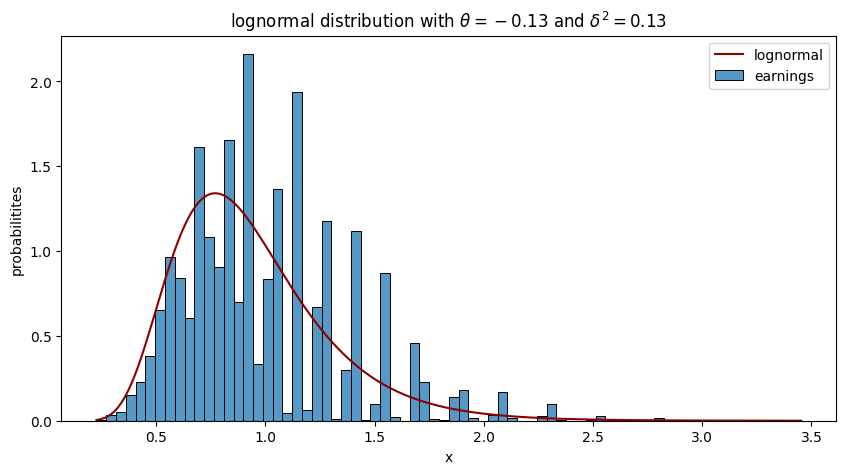

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(earnings, stat='density', label='earnings')
plt.plot(x_axis, probabilities, color='darkred', label='lognormal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.legend(loc='best')
plt.show()

Now, we compare the curve that seaborn library fit vs the curve that we fit with our distribution probabilities. The comparison is as follows:

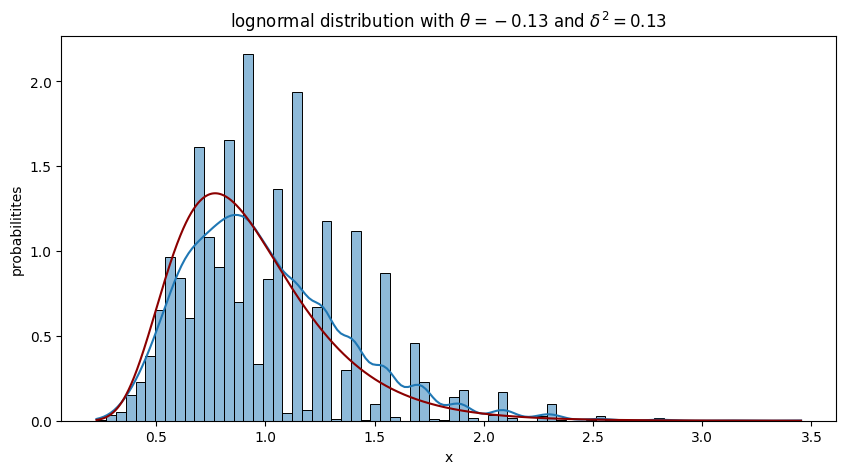

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(earnings, stat='density', kde=True, label='earnings') # stat = 'density', will come and 
# generate the values to make the area under the plot equal to one. So, the y-axis is probability density.
plt.plot(x_axis, probabilities, color='darkred', label='lognormal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.show()

Now, from the reference book, we know:

$$ X \sim lognormal(\theta, \delta^2) \rightarrow ln X = Y \sim N(\theta, \delta^2)$$

So, we can say, that:

$$X \sim N(\theta, \delta^2) \rightarrow e^X = Y \sim lognormal(\theta, \delta^2)$$

So, now we plot the $ln$ of the `individual` array to see if it is like the normal distribution with parameters $\mu=\theta$ and $\sigma^2=\delta^2$ or not. So, first, we simplement the noral distribution formula, and hen compare the plots. The plot, is as follows:

In [17]:
def normal(x):
    delta = np.sqrt(delta_2)
    first_half = 1/(np.sqrt(2*np.pi)*delta)
    power = -(np.power(x-theta, 2))/(2*delta_2)
    return first_half * np.exp(power)

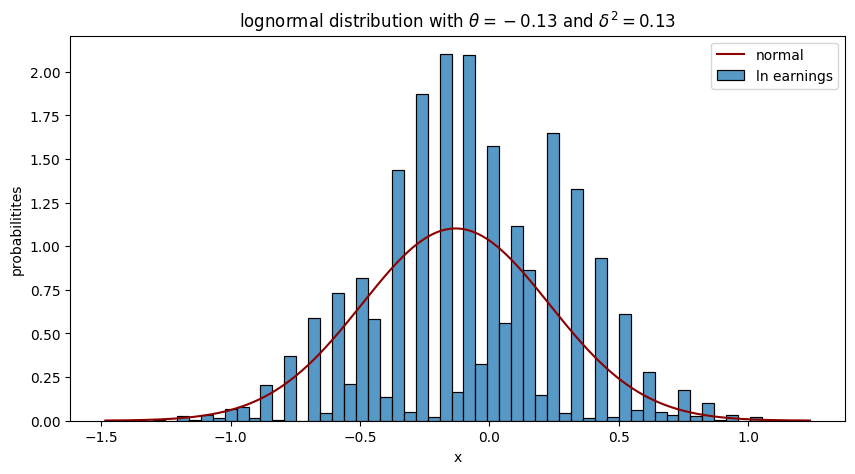

In [18]:
ln_earnings = np.log(earnings)

x_axis_normal = np.linspace(np.min(ln_earnings), np.max(ln_earnings), len(ln_earnings))
norm_prob = normal(x_axis_normal)

plt.figure(figsize=(10, 5))
sns.histplot(ln_earnings, stat='density', label='ln earnings') # stat = 'density', will come and 
# generate the values to make the area under the plot equal to one. So, the y-axis is probability density.
plt.plot(x_axis_normal, norm_prob, color='darkred', label='normal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.legend(loc='best')
plt.show()

### Task 6:

#### Task
Overlay the estimated lognormal distribution curve on the histogram.

#### Answer
We did this in the previous sections. But we do this again here. But this time, we define a variable called `BINS_COUNT` and set its value to 25. (we could also use any other value, but if we set its value to something very big, the result won't seem verygood and if we set its value too small, the result won't be good either)

In [19]:
BINS_COUNT = 25

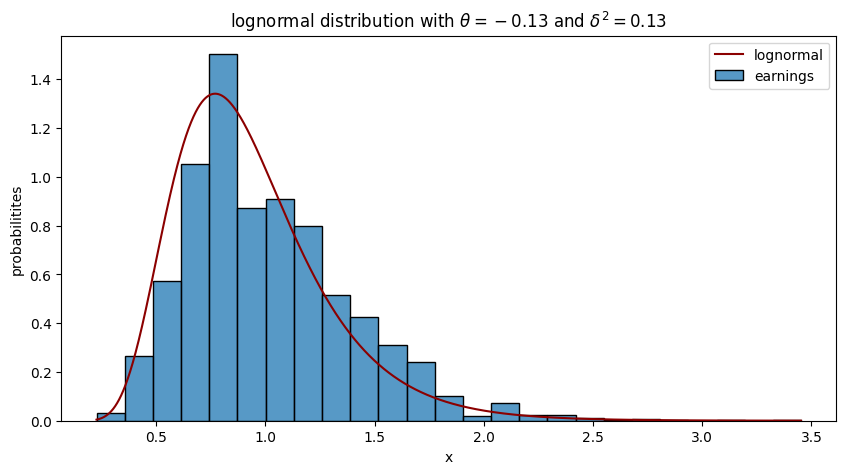

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(earnings, bins=BINS_COUNT, stat='density', label='earnings')
plt.plot(x_axis, probabilities, color='darkred', label='lognormal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.legend(loc='best')
plt.show()

### Task 7:

#### Task
Plot the fitted lognormal distribution separately.

#### Answer
we had done this in the previous sections. But we also do it again. First, we plot the fitted lognormal distribution as follows:

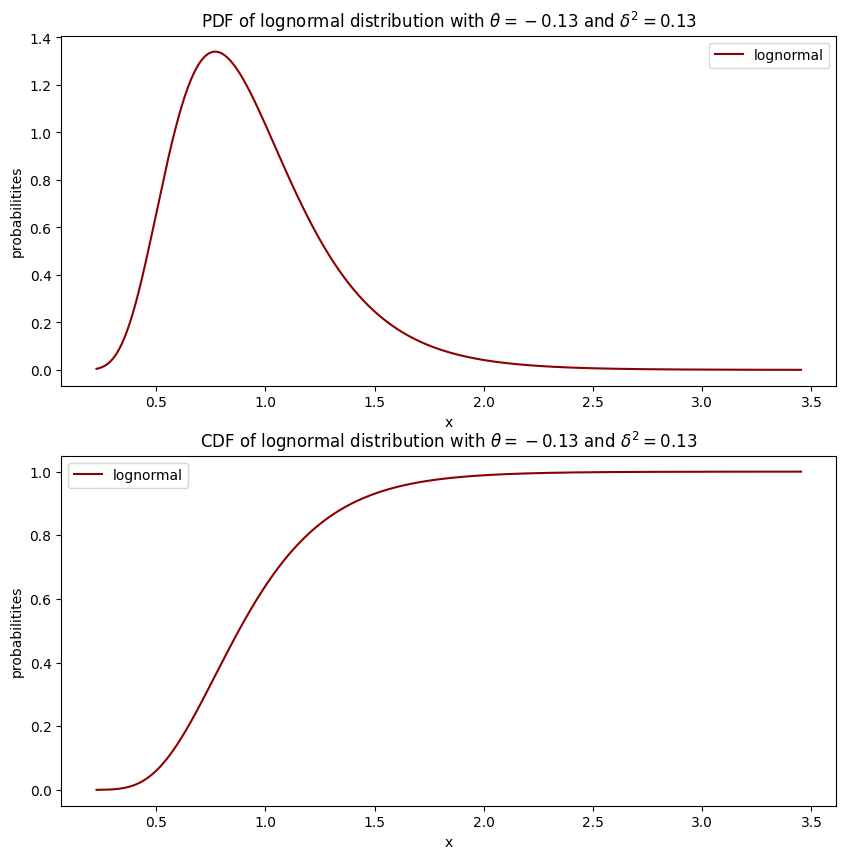

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(x_axis, probabilities, color='darkred', label='lognormal')
ax1.set_title(r'PDF of lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
ax1.set_xlabel('x')
ax1.set_ylabel('probabilitites')
ax1.legend(loc='best')

ax2.plot(x_axis, np.cumsum(probabilities)/np.sum(probabilities), color='darkred', label='lognormal')
ax2.set_title(r'CDF of lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
ax2.set_xlabel('x')
ax2.set_ylabel('probabilitites')
ax2.legend(loc='best')
plt.show()

# Question 2: Multivariate Analysis - Earnings and Wealth

## Description:

In addition to earnings, families in this society accumulate wealth over time. Wealth is correlated
with earnings, as a fraction of earnings is saved annually.

## Tasks:

### Task 1:

#### Task
Assume each family saves 20% of their annual earnings and spends the rest.

#### Answer
There is nothing to do about this part. This part is just an explanation about the next part.

### Task 2:

#### Task
Simulate the wealth accumulation process over the same 20 periods:
$$Wealth_{t+1} = 0.20 * Earnings_{t+1} + Wealth_t$$

#### Answer:
Now, we iterate over the earnings that we had saved foe each individual and then by the provided formula, we compute their Wealth. So, we have:

In [22]:
wealth = np.zeros(len(earnings))

for earn_arr in earnings_period_list:
    wealth += 0.2*earn_arr

wealth

array([3.7072194 , 3.18377218, 5.30441376, ..., 2.52205353, 4.9147641 ,
       4.42818793])

### Task 3:

#### Task
Plot the joint distribution of final earnings and wealth using a contour plot.

#### Answer
Now, we are asked to plot the joint distribution of the final wealth of the individuals with contour plot. So, we do that as follows:

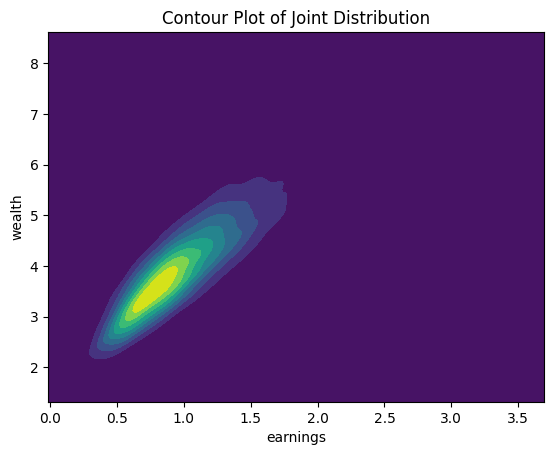

In [23]:
# Create the contour plot using seaborn
sns.kdeplot(x=earnings, y=wealth, fill=True, cmap='viridis', thresh=0)

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

Another way to do so is to generate a data frame from data and then cut it into some bins. Then plot the final plot. So, first, we define some variables named `EARNING_BINS` and `WEALTH_BINS` and initialize their value with 15 and 14. (nothing special about 15 and 14, we can do this for any number of bins, but when the bins count is too much or very few, then we won't have good results.)

In [24]:
EARNING_BINS = 15
WEALTH_BINS = 14

Now, we generate the data frame

In [25]:
import pandas as pd

data = {
    'wealth': wealth,
    'earnings': earnings,
}

df = pd.DataFrame(data)
df

,wealth,earnings
0,3.707219,0.693272
1,3.183772,0.555935
2,5.304414,1.253110
3,4.256543,1.265768
4,3.877410,0.510500
...,...,...
9995,3.074652,0.510500
9996,5.312729,1.392345
9997,2.522054,0.464091
9998,4.914764,1.265768


Now, we add a bin column for each of these two variables. We also add another columns called `bin-wealth-mean` and `bin-earnings-mean` in order to use for the `seaborn` library contour plot. We do this as follows:

In [26]:
df['bin-wealth'] = pd.cut(df['wealth'], WEALTH_BINS)
df['bin-wealth-mean'] = pd.cut(df['wealth'], WEALTH_BINS).apply(lambda x: (x.left + x.right) / 2)
df['bin-wealth-mean'] = pd.to_numeric(df['bin-wealth-mean'], errors='coerce')

df['bin-earnings'] = pd.cut(df['earnings'], EARNING_BINS)
df['bin-earnings-mean'] = pd.cut(df['earnings'], EARNING_BINS).apply(lambda x: (x.left + x.right) / 2)
df['bin-earnings-mean'] = pd.to_numeric(df['bin-earnings-mean'], errors='coerce')
df

,wealth,earnings,bin-wealth,bin-wealth-mean,bin-earnings,bin-earnings-mean
0,3.707219,0.693272,"(3.647, 4.087]",3.867,"(0.657, 0.872]",0.7645
1,3.183772,0.555935,"(2.767, 3.207]",2.987,"(0.442, 0.657]",0.5495
2,5.304414,1.253110,"(4.967, 5.407]",5.187,"(1.087, 1.302]",1.1945
3,4.256543,1.265768,"(4.087, 4.527]",4.307,"(1.087, 1.302]",1.1945
4,3.877410,0.510500,"(3.647, 4.087]",3.867,"(0.442, 0.657]",0.5495
...,...,...,...,...,...,...
9995,3.074652,0.510500,"(2.767, 3.207]",2.987,"(0.442, 0.657]",0.5495
9996,5.312729,1.392345,"(4.967, 5.407]",5.187,"(1.302, 1.517]",1.4095
9997,2.522054,0.464091,"(2.327, 2.767]",2.547,"(0.442, 0.657]",0.5495
9998,4.914764,1.265768,"(4.527, 4.967]",4.747,"(1.087, 1.302]",1.1945


We could also plot the contour plot with this data frame and the bin columns now. It would be like this:

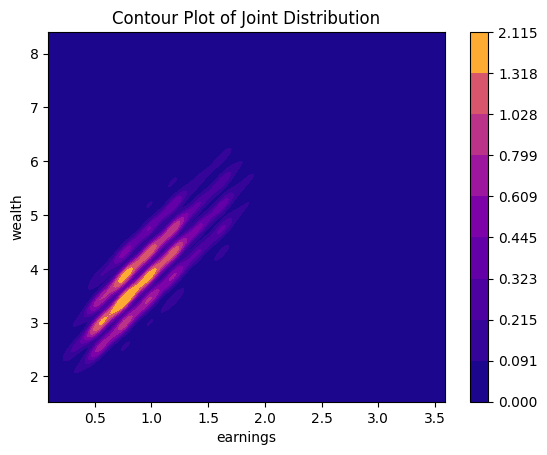

In [27]:
sns.kdeplot(data=df, x='bin-earnings-mean', y='bin-wealth-mean', fill=True, cbar=True, thresh=0, cmap='plasma')

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

Now, we generate the `probability_matrix` as follows:

In [28]:
contingency_matrix = pd.crosstab(df['bin-wealth-mean'], df['bin-earnings-mean'])
contingency_matrix

bin-earnings-mean,0.3325,0.5495,0.7645,0.9795,1.1945,1.4095,1.6245,1.8395,2.0545,2.2695,2.4845,2.6995,2.9145,3.1295,3.3445
bin-wealth-mean,,,,,,,,,,,,,,,
2.1040,41,22,0,0,0,0,0,0,0,0,0,0,0,0,0
2.5470,119,350,49,0,0,0,0,0,0,0,0,0,0,0,0
2.9870,43,676,466,45,1,0,0,0,0,0,0,0,0,0,0
3.4270,4,390,1059,406,70,3,0,0,0,0,0,0,0,0,0
3.8670,0,103,796,780,312,34,6,0,0,0,0,0,0,0,0
4.3070,0,1,251,611,591,161,58,0,0,0,0,0,0,0,0
4.7470,0,1,41,220,495,237,173,15,1,0,0,0,0,0,0
5.1870,0,0,4,46,220,159,197,44,10,0,0,0,0,0,0
5.6270,0,0,0,2,49,73,155,53,24,7,0,0,0,0,0


Now, we convert this to the numpy array as follows:

In [29]:
probability_matrix = contingency_matrix.to_numpy()
probability_matrix = probability_matrix / probability_matrix.sum().sum()
str(probability_matrix)[:120] + '...' # in order to avoid too many print lines

'[[4.100e-03 2.200e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00\n  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e...'

We will also need columns and rows values. So, here we compute them as follows:

In [30]:
earning_ordered_vals = contingency_matrix.columns.to_numpy()
earning_ordered_vals

array([0.3325, 0.5495, 0.7645, 0.9795, 1.1945, 1.4095, 1.6245, 1.8395,
       2.0545, 2.2695, 2.4845, 2.6995, 2.9145, 3.1295, 3.3445])

In [31]:
wealth_ordered_vals = contingency_matrix.index.to_numpy()
wealth_ordered_vals

array([2.104 , 2.547 , 2.987 , 3.427 , 3.867 , 4.307 , 4.747 , 5.187 ,
       5.627 , 6.067 , 6.507 , 6.9465, 7.386 , 7.826 ])

Now, we have to compute the marginal probabilities of each one of these variables. So, we do as follows:

In [32]:
wealth_marginal = probability_matrix.sum(axis=1)
wealth_marginal

array([0.0063, 0.0518, 0.1231, 0.1932, 0.2031, 0.1673, 0.1183, 0.068 ,
       0.0363, 0.018 , 0.0083, 0.0041, 0.0013, 0.0009])

In [33]:
earnings_marginal = probability_matrix.sum(axis=0)
earnings_marginal

array([2.070e-02, 1.543e-01, 2.666e-01, 2.110e-01, 1.741e-01, 6.870e-02,
       6.810e-02, 1.800e-02, 9.600e-03, 5.900e-03, 1.600e-03, 8.000e-04,
       2.000e-04, 2.000e-04, 2.000e-04])

Now, we can plot the contour plot as follows (I searched to much to get the code and after that I had a problem on having the correct values on the axises and after too many struggeling, I found the solution and corrected the code with a lot of search):

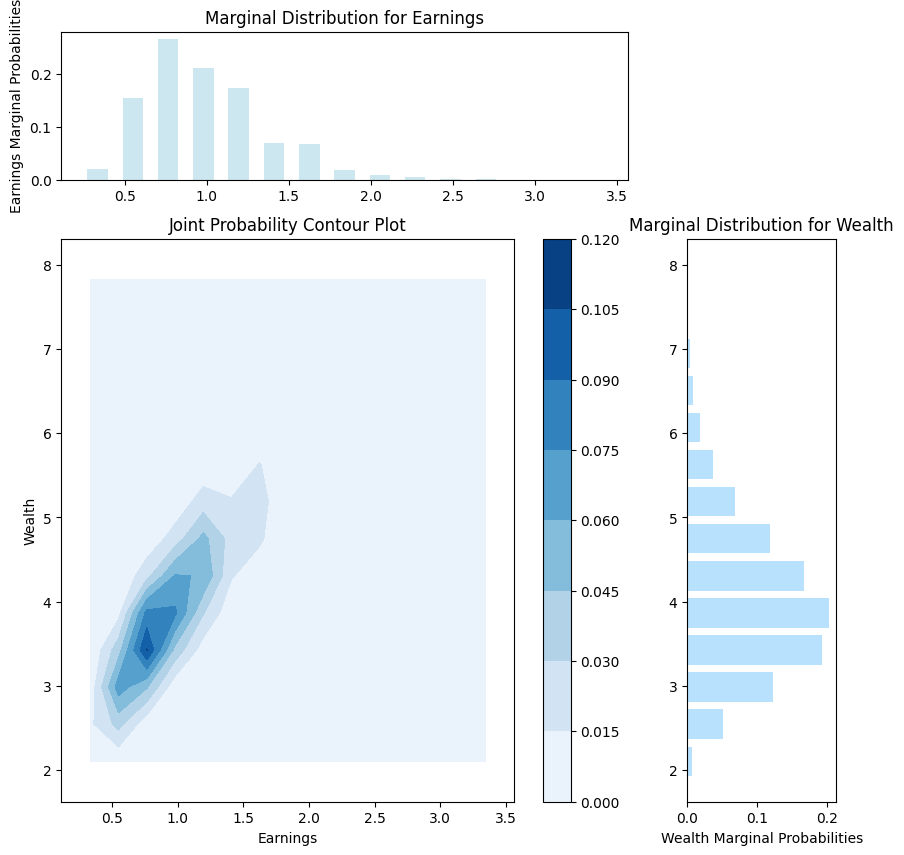

In [34]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(earning_ordered_vals, wealth_ordered_vals, probability_matrix, cmap='Blues')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(earning_ordered_vals, earnings_marginal, color='lightblue',  alpha=0.6, width=0.125)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(wealth_ordered_vals, wealth_marginal, color='lightskyblue', alpha=0.6, height=0.35) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

# Show the plot
plt.show()

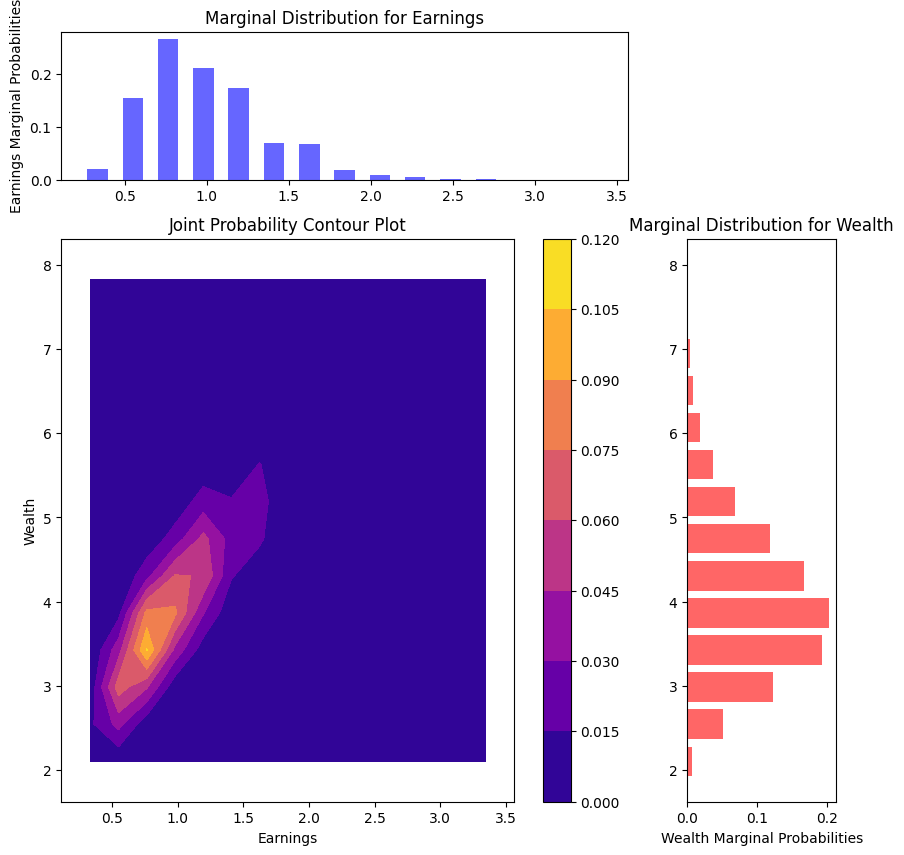

In [35]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(earning_ordered_vals, wealth_ordered_vals, probability_matrix, cmap='plasma')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(earning_ordered_vals, earnings_marginal, color='blue',  alpha=0.6, width=0.125)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(wealth_ordered_vals, wealth_marginal, color='red', alpha=0.6, height=0.35) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

# Show the plot
plt.show()

### Task 4:

#### Task
Compute the Pearson correlation coefficient between final earnings and wealth.

#### Answer
we know that the **Pearson correlation coefficient** can be computed with the following formula:

$$ \rho_{X,Y} = \frac{cov\left(X,Y \right)}{\sigma_{X}\sigma_{Y}}$$

Which we know that the formula for the $cov\left(X,Y \right)$ is as follows:

$$cov\left(X,Y \right) = E[\left(X-\mu_X \right) \left(Y-\mu_Y \right)]$$

And for our use cases, we we have discrete samples, so the formula would be as follows:

$$cov\left(X,Y \right) = \frac{ \sum_i{\left(x_i - \bar{x}\right) \left(y_i - \bar{y}\right)} }{n-1}$$

So, first, we write a code to compute the $cov\left(X, Y \right)$ as follows:

In [36]:
def covariance(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_dif = y - y_mean
    return np.sum(x_diff * y_dif) / (len(x_diff)-1)

Now, we test our function to see if it works correctly or not. We give it the following arrays: <br>

In [37]:
x = np.array(list(range(1000)))
y = np.array(list(range(1000))[::-1]) # same list, reverse order
res = covariance(x, y)
expected_res = np.cov(x, y)[0, 1]
print(f'computed covariance: {res} \t correct res: {expected_res} \t answer is: {res == expected_res}')

computed covariance: -83416.66666666667 	 correct res: -83416.66666666667 	 answer is: True


Now, we move to the next part that we compute the $\rho$ from the $cov$ and variances. So, the code for computing the Pearson's correlation coefficient is as follows:

In [38]:
def pearson_corr_coeff(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_2 = np.power(x, 2)
    y_2 = np.power(y, 2)
    x_diff = x_2 - np.power(x_mean, 2)
    y_diff = y_2 - np.power(y_mean, 2)
    x_std = np.sqrt(np.sum(x_diff) / (len(x)-1))
    y_std = np.sqrt(np.sum(y_diff) / (len(y)-1))
    cov = covariance(x, y)
    return cov / (x_std*y_std)

Now, we check the function with the following inputs and compare it with the reult of a library. So we do as follows (There also might be a slight difference in our computation and the library result, and thats because of the **percision lost** that we have from bringing the numpy result from c to python):

In [39]:
x = np.array(list(range(1, 1000, 2)))
y = np.array(list(range(1, 2000, 4))[::-1]) # same list, reverse order
res = pearson_corr_coeff(x, y)
expected_res = np.corrcoef(x, y)[0, 1]
print(f'computed Perasoncorrelation coefficient: {res} \t correct res: {expected_res} \t answer is: {res == expected_res}')

computed Perasoncorrelation coefficient: -1.0 	 correct res: -1.0 	 answer is: True


### Task 5:

#### Task:
Analyze the wealth distribution for families with low earnings (e.g., bottom 20%).

#### Answer
For this part, first, we define a variable and we set the percentage of the lower earning families that we want to analyes and then only get their wealth and earning.

In [40]:
LOWER_PERCENT = 20

Now we get only those who are in the lower 20% of the earning populations as follows:

In [41]:
threshold = np.percentile(earnings, LOWER_PERCENT)


lower_wealth = []
lower_earnings = []
for i in range(len(earnings)):
    if earnings[i] <= threshold:
        lower_wealth.append(wealth[i])
        lower_earnings.append(earnings[i])

In [42]:
str([(x, y) for x, y in zip(lower_wealth, lower_earnings)])[:120] + '...' # to avoid printing many lines

'[(np.float64(3.183772176982124), np.float64(0.555934613419797)), (np.float64(3.8774102963292636), np.float64(0.510500104...'

Now, we plot these individuals wealth as follows:

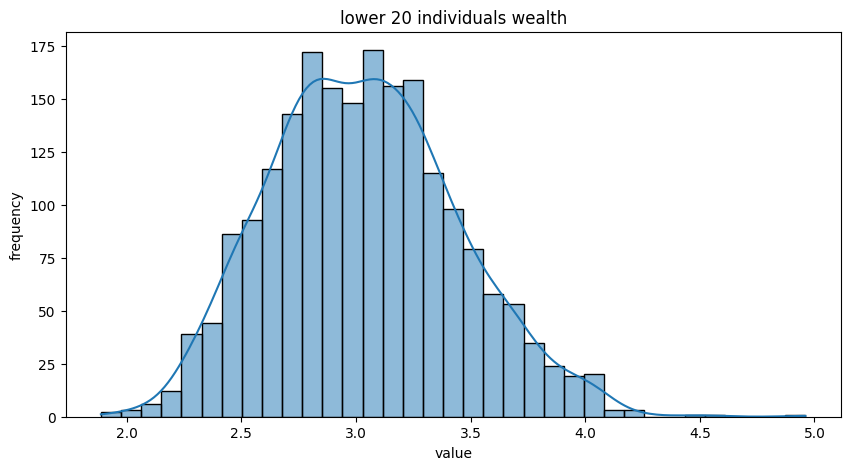

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(lower_wealth, kde=True, label=f'individuals wealth')
plt.title(f'lower {LOWER_PERCENT} individuals wealth')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

As we can see, the distribution is very simillar to normal distribution.

Let's also see the lower individuals earnings too:

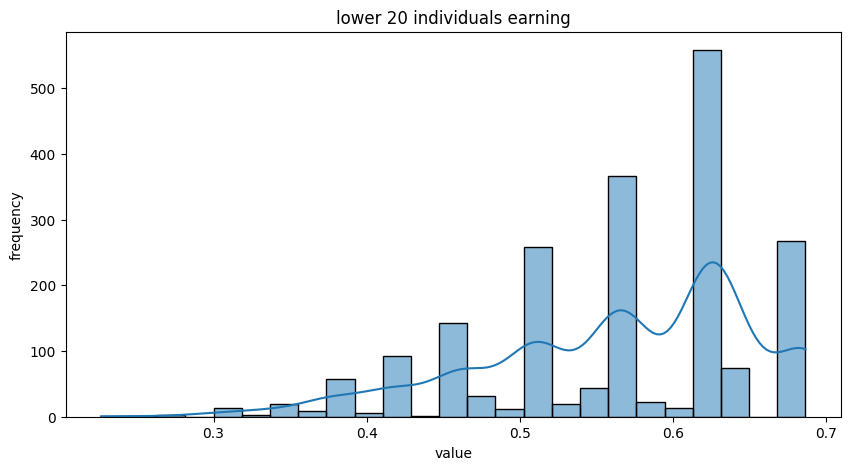

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(lower_earnings, kde=True, label=f'individuals earning')
plt.title(f'lower {LOWER_PERCENT} individuals earning')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

Now, lets plot have the contour plot of these individuals too to see whether it is different from previous one or not. The codes are in the previous sectiojns, so we just copy paste them here and we won't explain them so much.

###### simple contour plot

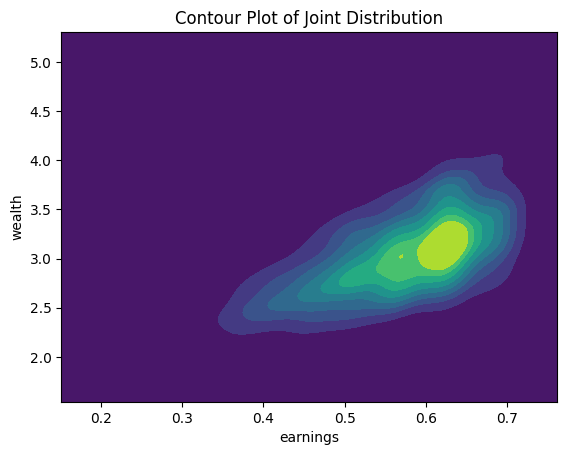

In [45]:
# Create the contour plot using seaborn
sns.kdeplot(x=lower_earnings, y=lower_wealth, fill=True, cmap='viridis', thresh=0)

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

###### our contour approach

In [46]:
lower_earning_bins = 6
lower_wealth_bins = 5

In [47]:
data = {
    'wealth': lower_wealth,
    'earnings': lower_earnings,
}

lower_df = pd.DataFrame(data)
lower_df

,wealth,earnings
0,3.183772,0.555935
1,3.877410,0.510500
2,2.423823,0.561550
3,2.419199,0.515657
4,3.129767,0.567222
...,...,...
2013,3.264612,0.623945
2014,2.869116,0.617705
2015,2.504016,0.421901
2016,3.074652,0.510500


In [48]:
lower_df['bin-wealth'] = pd.cut(lower_df['wealth'], WEALTH_BINS)
lower_df['bin-wealth-mean'] = pd.cut(lower_df['wealth'], WEALTH_BINS).apply(lambda x: (x.left + x.right) / 2)
lower_df['bin-wealth-mean'] = pd.to_numeric(lower_df['bin-wealth-mean'], errors='coerce')
lower_df
lower_df['bin-earnings'] = pd.cut(lower_df['earnings'], EARNING_BINS)
lower_df['bin-earnings-mean'] = pd.cut(lower_df['earnings'], EARNING_BINS).apply(lambda x: (x.left + x.right) / 2)
lower_df['bin-earnings-mean'] = pd.to_numeric(lower_df['bin-earnings-mean'], errors='coerce')
lower_df

,wealth,earnings,bin-wealth,bin-wealth-mean,bin-earnings,bin-earnings-mean
0,3.183772,0.555935,"(2.985, 3.205]",3.0950,"(0.533, 0.564]",0.5485
1,3.877410,0.510500,"(3.863, 4.083]",3.9730,"(0.502, 0.533]",0.5175
2,2.423823,0.561550,"(2.327, 2.546]",2.4365,"(0.533, 0.564]",0.5485
3,2.419199,0.515657,"(2.327, 2.546]",2.4365,"(0.502, 0.533]",0.5175
4,3.129767,0.567222,"(2.985, 3.205]",3.0950,"(0.564, 0.594]",0.5790
...,...,...,...,...,...,...
2013,3.264612,0.623945,"(3.205, 3.424]",3.3145,"(0.594, 0.625]",0.6095
2014,2.869116,0.617705,"(2.766, 2.985]",2.8755,"(0.594, 0.625]",0.6095
2015,2.504016,0.421901,"(2.327, 2.546]",2.4365,"(0.41, 0.441]",0.4255
2016,3.074652,0.510500,"(2.985, 3.205]",3.0950,"(0.502, 0.533]",0.5175


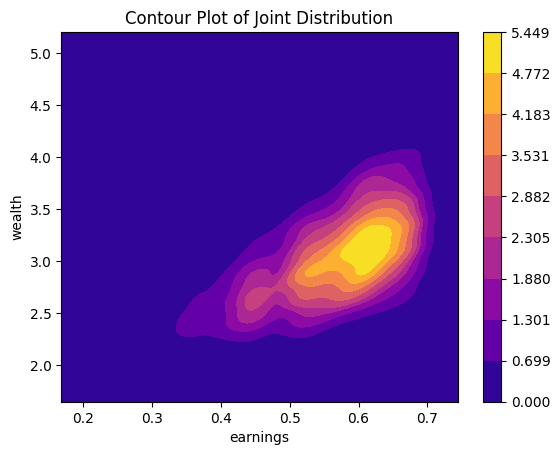

In [49]:
sns.kdeplot(data=lower_df, x='bin-earnings-mean', y='bin-wealth-mean', fill=True, cbar=True, thresh=0, cmap='plasma')

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

In [50]:
lower_contingency_matrix = pd.crosstab(lower_df['bin-wealth-mean'], lower_df['bin-earnings-mean'])

lower_probability_matrix = lower_contingency_matrix.to_numpy()
lower_probability_matrix = lower_probability_matrix / lower_probability_matrix.sum().sum()

lower_earning_ordered_vals = lower_contingency_matrix.columns.to_numpy()

lower_wealth_ordered_vals = lower_contingency_matrix.index.to_numpy()

lower_wealth_marginal = lower_probability_matrix.sum(axis=1)

lower_earnings_marginal = lower_probability_matrix.sum(axis=0)

lower_contingency_matrix

bin-earnings-mean,0.2415,0.2725,0.3030,0.3335,0.3645,0.3950,0.4255,0.4565,0.4870,0.5175,0.5485,0.5790,0.6095,0.6405,0.6710
bin-wealth-mean,,,,,,,,,,,,,,,
1.9955,2,1,0,3,0,0,1,0,0,0,0,0,0,0,0
2.2170,0,1,6,6,11,3,7,10,0,10,0,0,1,0,0
2.4365,0,0,7,5,23,3,31,36,1,32,18,8,7,3,1
2.6560,0,0,1,4,13,5,27,51,5,56,31,49,34,17,15
2.8755,0,0,0,3,9,3,19,41,1,82,50,51,83,34,30
3.0950,0,0,0,1,1,1,6,18,4,49,43,71,82,67,55
3.3145,0,0,0,0,1,0,3,12,3,36,28,38,75,67,65
3.5340,0,0,0,0,0,0,0,3,1,11,10,21,42,46,47
3.7535,0,0,0,0,0,0,0,0,0,1,5,6,40,23,26


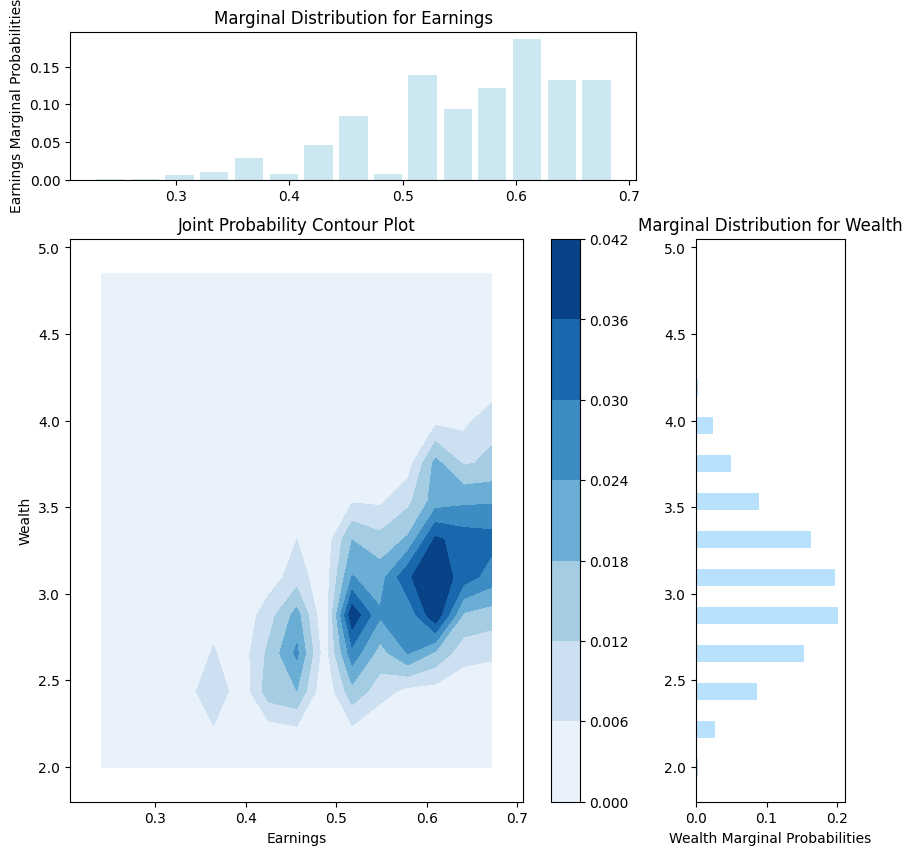

In [51]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(lower_earning_ordered_vals, lower_wealth_ordered_vals, lower_probability_matrix, cmap='Blues')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(lower_earning_ordered_vals, lower_earnings_marginal, color='lightblue', alpha=0.6, width=0.025)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(lower_wealth_ordered_vals, lower_wealth_marginal, color='lightskyblue', alpha=0.6, height=0.1) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

# Show the plot
plt.show()

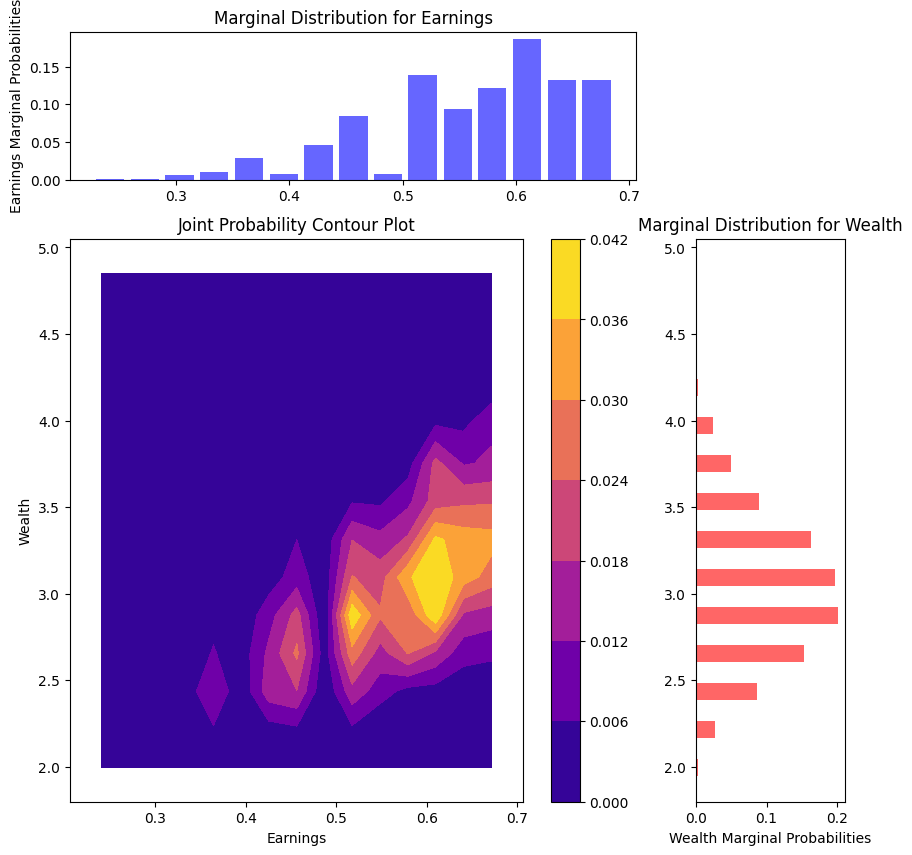

In [52]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(lower_earning_ordered_vals, lower_wealth_ordered_vals, lower_probability_matrix, cmap='plasma')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(lower_earning_ordered_vals, lower_earnings_marginal, color='blue',  alpha=0.6, width=0.025)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(lower_wealth_ordered_vals, lower_wealth_marginal, color='red', alpha=0.6, height=0.1) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

# Show the plot
plt.show()

# References

Some references are as follows:
- classes and notes
- reference book
- TA classes
- some websites like GeeksForGeeks, kaggle, stackoverflow and etc
- many other references for the coding part